РК №1 Богданов Д.А. Вариант №3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import category_encoders as ce

In [63]:
data = pd.read_csv('gender_classification_v7.csv')

In [64]:
data.shape

(5001, 8)

In [65]:
data.head

<bound method NDFrame.head of       long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lip

Для студентов группы ИУ5-24М, ИУ5И-24М - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

<AxesSubplot:xlabel='forehead_width_cm'>

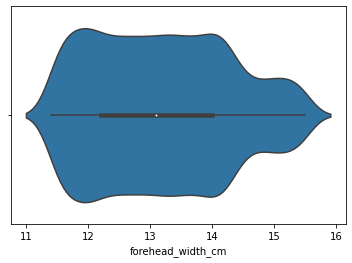

In [67]:
sns.violinplot(x = data['forehead_width_cm'])

Задача №1. Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "weight of evidence (WoE) encoding".

In [68]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [70]:
from category_encoders.woe import WOEEncoder as ce_WOEEncoder

In [71]:
ce_WOEEncoder1 = ce_WOEEncoder()
data_WOE_ENC = ce_WOEEncoder1.fit_transform(data[data.columns.difference(['nose_wide'])], data['nose_wide'])

In [72]:
data_WOE_ENC

,distance_nose_to_lip_long,forehead_height_cm,forehead_width_cm,gender,lips_thin,long_hair,nose_long
0,1,6.1,11.8,1.951239,1,1,0
1,0,5.4,14.0,-2.015670,1,0,0
2,1,6.3,11.8,1.951239,1,0,1
3,1,6.1,14.4,1.951239,1,0,1
4,0,5.9,13.5,-2.015670,0,1,0
...,...,...,...,...,...,...,...
4996,0,5.1,13.6,-2.015670,0,1,0
4997,0,5.4,11.9,-2.015670,0,1,0
4998,0,5.7,12.9,-2.015670,0,1,0
4999,0,6.2,13.2,-2.015670,0,1,0


In [77]:
# Проверка поля Gender
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [78]:
data_WOE_ENC['gender'].unique()

array([ 1.95123879, -2.01567037])

In [79]:
def check_woe_encoding(field):
    data_ones = data[data['nose_wide'] == 1].shape[0]
    data_zeros = data[data['nose_wide'] == 0].shape[0]
    
    for s in data[field].unique():
        data_filter = data[data[field]==s]
        if data_filter.shape[0] > 0:
            
            filter_data_ones = data_filter[data_filter['nose_wide'] == 1].shape[0]
            filter_data_zeros = data_filter[data_filter['nose_wide'] == 0].shape[0]

            good = filter_data_ones / data_ones
            bad = filter_data_zeros / data_zeros
            
            woe = np.log(good/bad)
            print(s, '-' , woe)

In [80]:
check_woe_encoding('gender')

Male - 1.9539499135957643
Female - -2.01867756658586


Задача №23.
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе правила трех сигм.

In [95]:
data = pd.read_csv('telecom_churn.csv')

<AxesSubplot:>

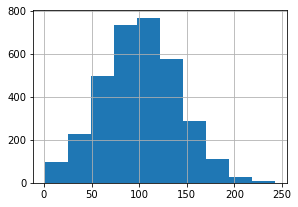

In [96]:
fig, ax = plt.subplots(figsize=(10,7))
plt.subplot(2, 2, 1)
data['account length'].hist(bins=10)

In [97]:
def get_outlier_boundaries(df, col):
    K1 = 3
    lower_boundary = df[col].mean() - (K1 * df[col].std())
    upper_boundary = df[col].mean() + (K1 * df[col].std())
    return lower_boundary, upper_boundary

In [98]:
lower_boundary, upper_boundary = get_outlier_boundaries(data, 'account length')
outliers_temp = np.where(data['account length'] > upper_boundary, True, 
                                 np.where(data['account length'] < lower_boundary, True, False))
data_trimmed = data.loc[~(outliers_temp), ]

<AxesSubplot:>

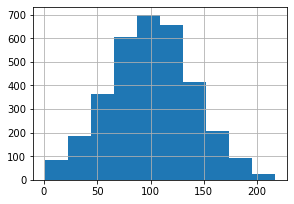

In [99]:
fig, ax = plt.subplots(figsize=(10,7))
plt.subplot(2, 2, 1)
data_trimmed['account length'].hist(bins=10)